In [1]:
import numpy as np

weight = [5,5,5,5,3,3,3,3,2,2,2,2,1,1,1,1]
def calculate_heuristic(state):
    global weight
    s = 0
    size = len(state)
    for i in range(size - 1):
        if state[i] != -1:
            for j in range(i + 1, size):
                if state[j] != -1:
                    if state[i] > state[j]:
                        s += 1
    for i in range(size - 2):
        if state[i] == i + 1:
            s -= weight[i]
    if state[size - 1] == -1:
        s -= 1
    return s

class Node:
    def __init__(self, state, parent = None):
        self.state = state
        self.heuristic = calculate_heuristic(state)
        self.parent = parent

class PriorityQueue:
    def __init__(self):
        self.queue = []
    
    def add(self, node):
        pos = self._find_insertion_pos(node.heuristic)
        self.queue.insert(pos, node)
    
    def pop(self, idx = -1):
        return self.queue.pop(idx)
    
    def length(self):
        return len(self.queue)
            
    def _find_insertion_pos(self, heur):
        if len(self.queue) == 0:
            return 0
        elif len(self.queue) == 1:
            if self.queue[0].heuristic > heur:
                return 0
            else:
                return 1
        elif len(self.queue) == 2:
            for i in range(len(self.queue)):
                if self.queue[i].heuristic > heur:
                    return i
            return 2
        else:
            lt = 0
            rt = len(self.queue) - 1
            while lt + 1 < rt:
                mid = (lt + rt) // 2
                h = self.queue[mid].heuristic
                if h > heur:
                    rt = mid
                elif h < heur:
                    lt = mid
                else:
                    return mid
            return lt + 1

            

class Puzzle:
    def __init__(self, size = 3):
        self.board = np.array([i + 1 for i in range(size * size)])
        self.board[size * size - 1] = -1
        self.size = size

        self.generate_random_board()
        self.move_blank_to_the_tail()

    def generate_random_board(self):
        np.random.shuffle(self.board)
        while self.count_inverse_number() % 2 != 0:
            np.random.shuffle(self.board)

    def move_blank_to_the_tail(self):
        blank = np.where(self.board == -1)[0][0]
        for i in range(blank, self.size * self.size - 1):
            self.board[i], self.board[i + 1] = self.board[i + 1], self.board[i]

    
    def count_inverse_number(self):
        s = 0
        size = self.size

        for i in range(size * size - 1):
            if self.board[i] != -1:
                for j in range(i + 1, size * size):
                    if self.board[j] != -1:
                        if self.board[i] > self.board[j]:
                            s += 1
        return s

    def snapshot(self):
         return tuple(self.board)

    def display(self, state):
        size = self.size
        for i in range(len(state)):
            if state[i] != -1:
                print("%-2d"%(state[i]), end=" ")
            else:
                print("%-2s"%("#"), end=" ")
            if (i + 1) % size == 0:
                print("")


    def win(self):
        size = self.size
        return self.count_inverse_number() == 0 and self.board[size * size - 1] == -1

    def swap_and_add(self, l, visited_states, parent, blank, other):
        board = self.board.copy()
        board[blank], board[other] = board[other], board[blank]
        new_state = tuple(board)
        if new_state not in visited_states:
            new_node = Node(new_state, parent)
            l.add(new_node)

    def solve(self):
        visited_states = set()
        root = Node(self.snapshot())
        l = PriorityQueue()
        l.add(root)

        while l.length() > 0:
            node = l.pop(0)
            state = node.state
            self.board = np.array(state)
            visited_states.add(state)

            if self.win():
                print("Solution Found!")
                res = []
                while node:
                    res.append(node.state)
                    node = node.parent
                res.reverse()
                print("{} steps needed:".format(len(res) - 1))
                for i in range(len(res)):
                    print("STEP {}".format(i))
                    self.display(res[i])
                    print("")
                return res


            blank = np.where(self.board == -1)[0][0]
            size = self.size
            if blank / size >= 1:
                top = blank - size
                self.swap_and_add(l, visited_states, node, blank, top)

            if blank / size < size - 1:
                bottom = blank + size
                self.swap_and_add(l, visited_states, node, blank, bottom)

            if blank % size > 0:
                left = blank - 1
                self.swap_and_add(l, visited_states, node, blank, left)

            if blank % size < size - 1:
                right = blank + 1
                self.swap_and_add(l, visited_states, node, blank, right)


        return "Unsolvable!"


In [19]:
g = Puzzle(4)

In [20]:
g.win()

False

In [21]:
g.display(g.snapshot())

5  13 9  15 
8  1  14 10 
2  4  7  6  
12 3  11 #  


In [22]:
solution = g.solve()

Solution Found!
246 steps needed:
STEP 0
5  13 9  15 
8  1  14 10 
2  4  7  6  
12 3  11 #  

STEP 1
5  13 9  15 
8  1  14 10 
2  4  7  6  
12 3  #  11 

STEP 2
5  13 9  15 
8  1  14 10 
2  4  #  6  
12 3  7  11 

STEP 3
5  13 9  15 
8  1  #  10 
2  4  14 6  
12 3  7  11 

STEP 4
5  13 9  15 
8  1  10 #  
2  4  14 6  
12 3  7  11 

STEP 5
5  13 9  #  
8  1  10 15 
2  4  14 6  
12 3  7  11 

STEP 6
5  13 #  9  
8  1  10 15 
2  4  14 6  
12 3  7  11 

STEP 7
5  #  13 9  
8  1  10 15 
2  4  14 6  
12 3  7  11 

STEP 8
5  1  13 9  
8  #  10 15 
2  4  14 6  
12 3  7  11 

STEP 9
5  1  13 9  
8  4  10 15 
2  #  14 6  
12 3  7  11 

STEP 10
5  1  13 9  
8  4  10 15 
2  3  14 6  
12 #  7  11 

STEP 11
5  1  13 9  
8  4  10 15 
2  3  14 6  
12 7  #  11 

STEP 12
5  1  13 9  
8  4  10 15 
2  3  #  6  
12 7  14 11 

STEP 13
5  1  13 9  
8  4  #  15 
2  3  10 6  
12 7  14 11 

STEP 14
5  1  #  9  
8  4  13 15 
2  3  10 6  
12 7  14 11 

STEP 15
5  #  1  9  
8  4  13 15 
2  3  10 6  
12 7  14 11 



#  5  6  8  
4  9  11 12 
10 13 14 15 

STEP 176
1  2  3  7  
5  #  6  8  
4  9  11 12 
10 13 14 15 

STEP 177
1  2  3  7  
5  6  #  8  
4  9  11 12 
10 13 14 15 

STEP 178
1  2  3  7  
5  6  11 8  
4  9  #  12 
10 13 14 15 

STEP 179
1  2  3  7  
5  6  11 8  
4  #  9  12 
10 13 14 15 

STEP 180
1  2  3  7  
5  6  11 8  
#  4  9  12 
10 13 14 15 

STEP 181
1  2  3  7  
5  6  11 8  
10 4  9  12 
#  13 14 15 

STEP 182
1  2  3  7  
5  6  11 8  
10 4  9  12 
13 #  14 15 

STEP 183
1  2  3  7  
5  6  11 8  
10 4  9  12 
13 14 #  15 

STEP 184
1  2  3  7  
5  6  11 8  
10 4  #  12 
13 14 9  15 

STEP 185
1  2  3  7  
5  6  #  8  
10 4  11 12 
13 14 9  15 

STEP 186
1  2  3  7  
5  #  6  8  
10 4  11 12 
13 14 9  15 

STEP 187
1  2  3  7  
5  4  6  8  
10 #  11 12 
13 14 9  15 

STEP 188
1  2  3  7  
5  4  6  8  
#  10 11 12 
13 14 9  15 

STEP 189
1  2  3  7  
#  4  6  8  
5  10 11 12 
13 14 9  15 

STEP 190
1  2  3  7  
4  #  6  8  
5  10 11 12 
13 14 9  15 

STEP 191
1  2  3  7  
4  6  # 

In [23]:
from time import sleep
import matplotlib.pyplot as plt
from IPython import display

In [24]:
pic = []
for i in range(1, 16):
    pic.append(np.load('{}.npy'.format(i)))
pic.append(np.load('empty.npy'))

In [25]:
def visualise(solution):
    global pic
    for t in range(len(solution)):
        s = solution[t]
        res = []
        for i in s:
            if i != -1:
                res.append(pic[i-1])
            else:
                res.append(pic[i])
        show_board(res, t, len(solution)-1)
            

In [26]:
def show_board(pic, t, total):
    res = np.hstack((pic[0],pic[1],pic[2],pic[3]))
    for i in range(4, 16, 4):
        res = np.vstack((res, np.hstack((pic[0 + i],pic[1 + i],pic[2 + i],pic[3 + i])))) 
        
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.set_title('{}/{}'.format(t, total)) 
    plt.imshow(res)
    display.clear_output(wait=True)
    #And display the rendering
    display.display(plt.gcf())
    

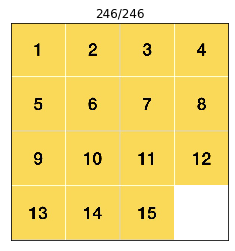

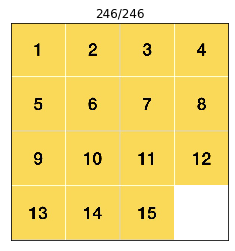

In [27]:
visualise(solution)